In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\komma\OneDrive\Desktop\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
df.sum()

Channel                 582
Region                 1119
Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

In [11]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [13]:
array=df.values

In [15]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [17]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [19]:
X




array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [21]:
import scipy.cluster.hierarchy as sch

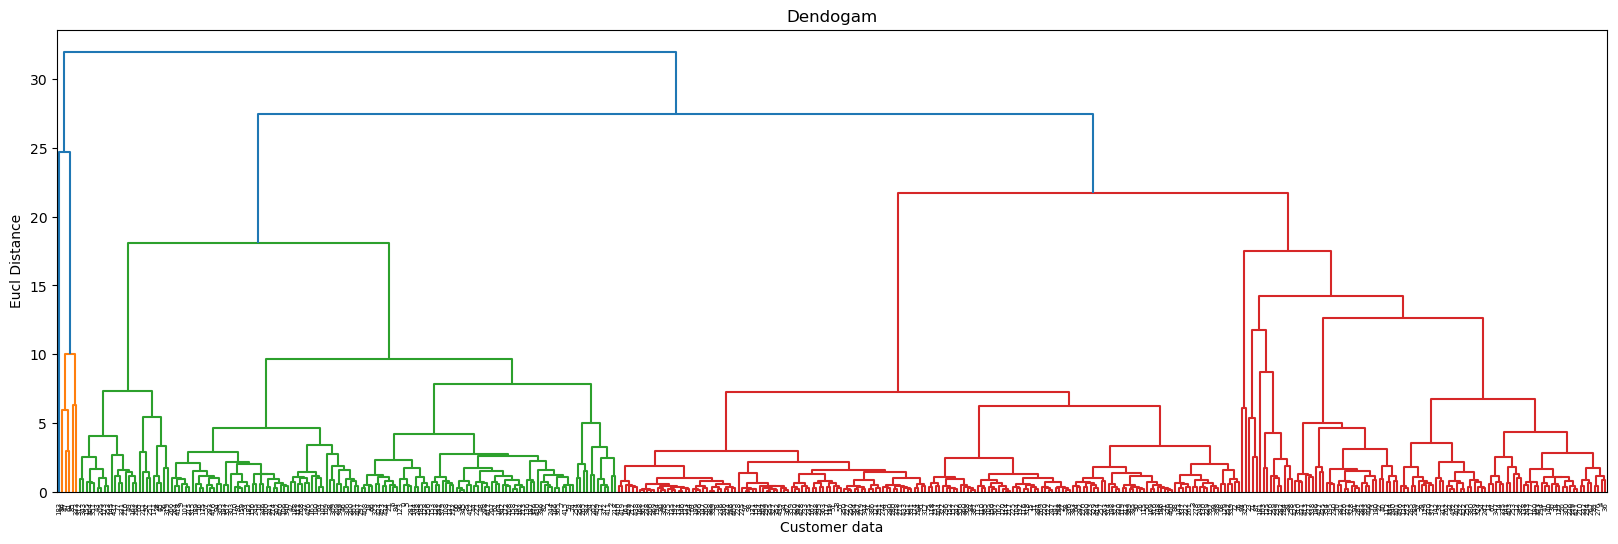

In [23]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogam')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()


In [24]:
len(set(dendo['color_list']))-1

3

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
group = AgglomerativeClustering(n_clusters=3)
group.fit_predict(X)

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [27]:
cluster = group.fit_predict(X)
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [28]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.2646091480214908

In [38]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [62]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
wscc=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wscc.append(kmeans.inertia_)

In [66]:
wscc

[2266.955266583245,
 1644.059851234756,
 1326.6746082135533,
 1070.2551995135616,
 989.3326418885057,
 856.7070228388114,
 791.8280762163155,
 710.1943394067517,
 668.22250548469]

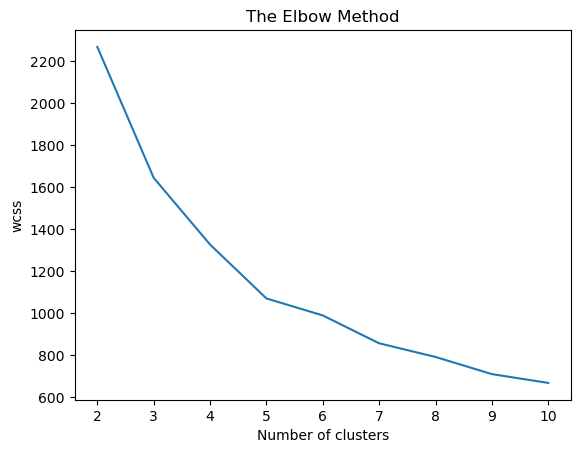

In [68]:
plt.plot(range(2,11),wscc)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [80]:
model=KMeans(n_clusters=4, random_state=390)
groups=model.fit_predict(X)

In [84]:
groups

array([0, 2, 2, 0, 3, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       3, 1, 2, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 3, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 0, 3, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 3,
       0, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 0, 2,
       0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       3, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 3, 2,
       0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,